In [9]:
%matplotlib inline
%load_ext tensorboard
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers, models
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()       #load data

K = len(np.unique(y_train))     # Number of classes
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Create a sequential model
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))        # 32, 3X3 convolution layers
model.add(layers.MaxPooling2D((2,2)))                                               # 2x2 max pooling layer
model.add(layers.Conv2D(64,(3,3), activation='relu' ))                              # 64, 3X3 convolution layers
model.add(layers.MaxPooling2D((2,2)))                                               # 2x2 max pooling layer
model.add(layers.Conv2D(64,(3,3), activation='relu' ))                              # 64, 3X3 convolution layers
model.add(layers.MaxPooling2D((2,2)))                                               # 2x2 max pooling layer
model.add(layers.Flatten())                                                         # Flattening the output of the convolutional layer
model.add(layers.Dense(64, activation='relu' ))                                     # fully connected layer with 64 units
model.add(layers.Dense(10))                                                         # fully connected layer with 10 units

model.summary()     #Get model summary
SGD=tf.keras.optimizers.SGD(learning_rate=0.01, decay=0.999, momentum =0.9, name='SGD', nesterov= False) #Get SGD optimizer with momentum
model.compile(optimizer=SGD, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy']) 

history = model.fit(x_train, y_train, epochs=50, batch_size=50, validation_data=(x_test, y_test))

print(model.optimizer.get_config())


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 64)          0         
______________________________

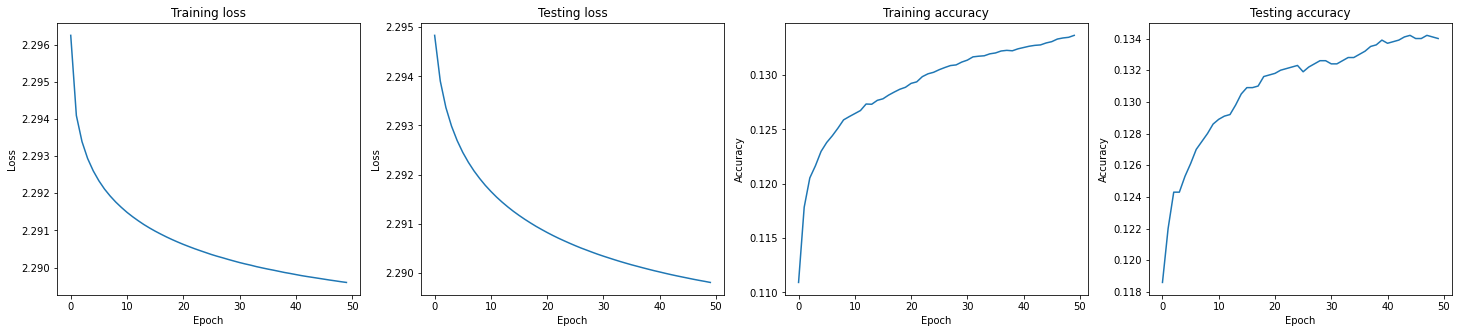

In [10]:
# Plotting losses and accuracies 
fig , ax = plt.subplots(figsize=(25,5 ))
plt.subplot(1,4,1)
plt.plot(history.history['loss'])
plt.title("Training loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,4,2)
plt.plot(history.history['val_loss'])
plt.title("Testing loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,4,3)
plt.plot(history.history['accuracy'])
plt.title("Training accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,4,4)
plt.plot(history.history['val_accuracy'])
plt.title("Testing accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

